# Movie Rentals

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [73]:
movies = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\11_Movie_Rental_Duration\rental_info.csv',
                     parse_dates=['rental_date','return_date'])
movies.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [74]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   rental_date       15861 non-null  datetime64[ns, UTC]
 1   return_date       15861 non-null  datetime64[ns, UTC]
 2   amount            15861 non-null  float64            
 3   release_year      15861 non-null  float64            
 4   rental_rate       15861 non-null  float64            
 5   length            15861 non-null  float64            
 6   replacement_cost  15861 non-null  float64            
 7   special_features  15861 non-null  object             
 8   NC-17             15861 non-null  int64              
 9   PG                15861 non-null  int64              
 10  PG-13             15861 non-null  int64              
 11  R                 15861 non-null  int64              
 12  amount_2          15861 non-null  float64            
 13  l

- Create a column named `rental_length_days` using the columns `return_date` and `rental_date`, and add it to the pandas DataFrame. This column should contain information on how many days a DVD has been rented by a customer.

In [75]:
movies['rental_length_days'] = (movies['return_date'] - movies['rental_date']).dt.days

In [76]:
movies.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length_days
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4


- Create two columns of dummy variables from `special_features`, which takes the value of 1 when:
    * The value is "Deleted Scenes", storing as a column called `deleted_scenes`.
    * The value is "Behind the Scenes", storing as a column called `behind_the_scenes`.

In [77]:
movies['special_features'].value_counts()

special_features
{Trailers,Commentaries,"Behind the Scenes"}                     1308
{Trailers}                                                      1139
{Trailers,Commentaries}                                         1129
{Trailers,"Behind the Scenes"}                                  1122
{"Behind the Scenes"}                                           1108
{Commentaries,"Deleted Scenes","Behind the Scenes"}             1101
{Commentaries}                                                  1089
{Commentaries,"Behind the Scenes"}                              1078
{Trailers,"Deleted Scenes"}                                     1047
{"Deleted Scenes","Behind the Scenes"}                          1035
{"Deleted Scenes"}                                              1023
{Commentaries,"Deleted Scenes"}                                 1011
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}     983
{Trailers,Commentaries,"Deleted Scenes"}                         916
{Trailers,"Delete

In [78]:
movies['special_features'].str.contains('Behind the Scenes')

0        True
1        True
2        True
3        True
4        True
         ... 
15856    True
15857    True
15858    True
15859    True
15860    True
Name: special_features, Length: 15861, dtype: bool

In [79]:
movies['special_features'].str.contains('Deleted Scenes')

0        False
1        False
2        False
3        False
4        False
         ...  
15856     True
15857     True
15858     True
15859     True
15860     True
Name: special_features, Length: 15861, dtype: bool

In [80]:
movies['behind_the_scenes'] = np.where(movies['special_features'].str.contains('Behind the Scenes'), 1, 0)
movies['deleted_scenes'] = np.where(movies['special_features'].str.contains('Deleted Scenes'), 1, 0)

movies['commentaries'] = np.where(movies['special_features'].str.contains('Commentaries'), 1, 0)
movies['trailers'] = np.where(movies['special_features'].str.contains('Trailers'), 1, 0)

In [81]:
movies['behind_the_scenes'].value_counts()

behind_the_scenes
1    8507
0    7354
Name: count, dtype: int64

In [82]:
movies['deleted_scenes'].value_counts()

deleted_scenes
0    7973
1    7888
Name: count, dtype: int64

In [83]:
movies['release_year'].value_counts()

release_year
2004.0    2645
2006.0    2493
2007.0    2433
2010.0    2219
2009.0    2197
2005.0    2105
2008.0    1769
Name: count, dtype: int64

In [84]:
movies['release_year'] = movies['release_year'].astype('int').astype('object')

## Drop Features

- Eliminate redundant features like `amount_2`, which is simply a squared version of `amount`.
- Remove date-related features such as `rental_date` and `return_date`, as they are used to create the target variable.
- Drop `special_features` as it was utilized in generating new features: `behind_the_scenes` and `deleted_scenes` columns.

In [88]:
movies.columns

Index(['amount', 'release_year', 'rental_rate', 'length', 'replacement_cost',
       'NC-17', 'PG', 'PG-13', 'R', 'rental_length_days', 'behind_the_scenes',
       'deleted_scenes', 'commentaries', 'trailers'],
      dtype='object')

In [86]:
movies.drop(columns=['rental_date','return_date','special_features','amount_2','length_2','rental_rate_2'], inplace=True)

movies.head()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,rental_length_days,behind_the_scenes,deleted_scenes,commentaries,trailers
0,2.99,2005,2.99,126.0,16.99,0,0,0,1,3,1,0,0,1
1,2.99,2005,2.99,126.0,16.99,0,0,0,1,2,1,0,0,1
2,2.99,2005,2.99,126.0,16.99,0,0,0,1,7,1,0,0,1
3,2.99,2005,2.99,126.0,16.99,0,0,0,1,2,1,0,0,1
4,2.99,2005,2.99,126.0,16.99,0,0,0,1,4,1,0,0,1


## Correlation

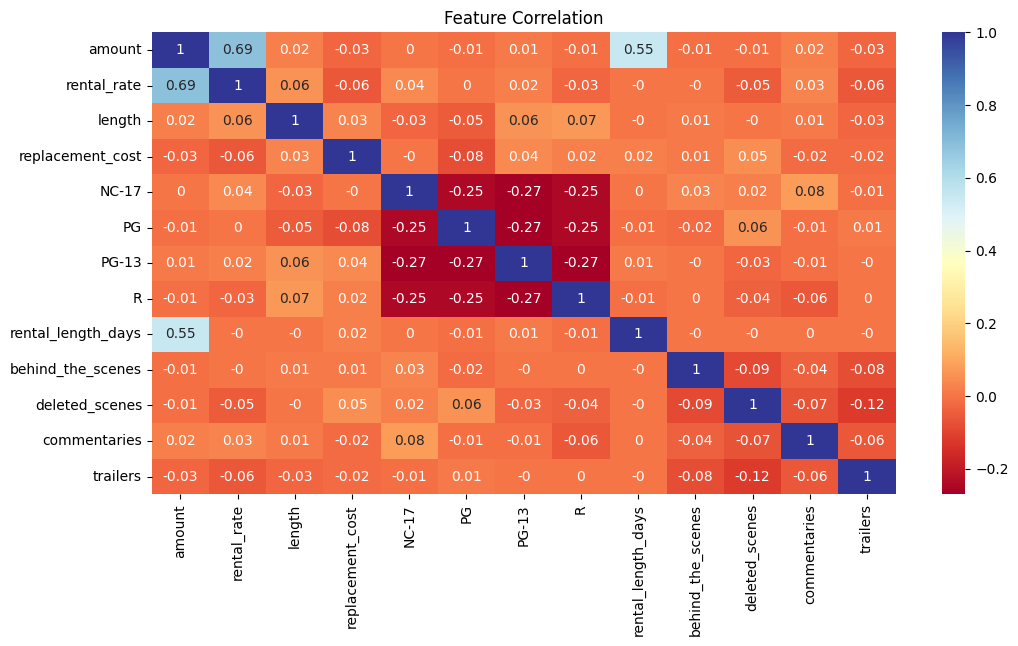

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(round(movies.corr(numeric_only=True), 2), annot=True, cmap='RdYlBu')
plt.title('Feature Correlation')

plt.show()

Based on the heatmap, we see that the target variable has the strongest positive relationship with the `amount` feature. Apart from `amount`, there don't appear to be any correlations with the target variable.

## Preprocess Data

In [89]:
movies.columns

Index(['amount', 'release_year', 'rental_rate', 'length', 'replacement_cost',
       'NC-17', 'PG', 'PG-13', 'R', 'rental_length_days', 'behind_the_scenes',
       'deleted_scenes', 'commentaries', 'trailers'],
      dtype='object')

In [93]:
encoded_data = pd.get_dummies(movies.select_dtypes('object'), dtype='int')

encoded_data

,release_year_2004,release_year_2005,release_year_2006,release_year_2007,release_year_2008,release_year_2009,release_year_2010
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15856,0,0,0,0,0,1,0
15857,0,0,0,0,0,1,0
15858,0,0,0,0,0,1,0
15859,0,0,0,0,0,1,0


In [94]:
movies.select_dtypes(exclude='object')

,amount,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,rental_length_days,behind_the_scenes,deleted_scenes,commentaries,trailers
0,2.99,2.99,126.0,16.99,0,0,0,1,3,1,0,0,1
1,2.99,2.99,126.0,16.99,0,0,0,1,2,1,0,0,1
2,2.99,2.99,126.0,16.99,0,0,0,1,7,1,0,0,1
3,2.99,2.99,126.0,16.99,0,0,0,1,2,1,0,0,1
4,2.99,2.99,126.0,16.99,0,0,0,1,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,6.99,4.99,88.0,11.99,0,0,0,1,6,1,1,0,1
15857,4.99,4.99,88.0,11.99,0,0,0,1,4,1,1,0,1
15858,8.99,4.99,88.0,11.99,0,0,0,1,9,1,1,0,1
15859,7.99,4.99,88.0,11.99,0,0,0,1,8,1,1,0,1


In [96]:
scaler = StandardScaler()

numeric = movies[['amount','rental_rate','length','replacement_cost']]

scaled_data = pd.DataFrame(scaler.fit_transform(numeric), columns=numeric.columns)

scaled_data

,amount,rental_rate,length,replacement_cost
0,-0.519915,0.027822,0.274357,-0.531713
1,-0.519915,0.027822,0.274357,-0.531713
2,-0.519915,0.027822,0.274357,-0.531713
3,-0.519915,0.027822,0.274357,-0.531713
4,-0.519915,0.027822,0.274357,-0.531713
...,...,...,...,...
15856,1.174778,1.240154,-0.672956,-1.353596
15857,0.327431,1.240154,-0.672956,-1.353596
15858,2.022125,1.240154,-0.672956,-1.353596
15859,1.598452,1.240154,-0.672956,-1.353596


In [97]:
movies.columns

Index(['amount', 'release_year', 'rental_rate', 'length', 'replacement_cost',
       'NC-17', 'PG', 'PG-13', 'R', 'rental_length_days', 'behind_the_scenes',
       'deleted_scenes', 'commentaries', 'trailers'],
      dtype='object')

In [99]:
binary_ft = movies[['NC-17', 'PG', 'PG-13', 'R', 'behind_the_scenes', 'deleted_scenes', 'commentaries', 'trailers']]
binary_ft

,NC-17,PG,PG-13,R,behind_the_scenes,deleted_scenes,commentaries,trailers
0,0,0,0,1,1,0,0,1
1,0,0,0,1,1,0,0,1
2,0,0,0,1,1,0,0,1
3,0,0,0,1,1,0,0,1
4,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
15856,0,0,0,1,1,1,0,1
15857,0,0,0,1,1,1,0,1
15858,0,0,0,1,1,1,0,1
15859,0,0,0,1,1,1,0,1


In [101]:
movies_clean = pd.concat([scaled_data, encoded_data, binary_ft], axis=1)

movies_clean.head()

,amount,rental_rate,length,replacement_cost,release_year_2004,release_year_2005,release_year_2006,release_year_2007,release_year_2008,release_year_2009,release_year_2010,NC-17,PG,PG-13,R,behind_the_scenes,deleted_scenes,commentaries,trailers
0,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
1,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
2,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1


## Model Training

- Make a pandas DataFrame called X containing all the appropriate features you can use to run the regression models, avoiding columns that leak data about the target.
- Choose the "rental_length_days" as the target column and save it as a pandas Series called y.

In [102]:
X = movies_clean.copy()
y = movies['rental_length_days']

In [103]:
X.head()

,amount,rental_rate,length,replacement_cost,release_year_2004,release_year_2005,release_year_2006,release_year_2007,release_year_2008,release_year_2009,release_year_2010,NC-17,PG,PG-13,R,behind_the_scenes,deleted_scenes,commentaries,trailers
0,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
1,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
2,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
3,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,-0.519915,0.027822,0.274357,-0.531713,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1


In [104]:
y.head()

0    3
1    2
2    7
3    2
4    4
Name: rental_length_days, dtype: int64

- Split the data into X_train, y_train, X_test, and y_test train and test sets, avoiding any features that leak data about the target variable, and include 20% of the total data in the test set.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12688, 19), (3173, 19), (12688,), (3173,))

In [108]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [111]:
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

In [113]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [119]:
scores = pd.DataFrame({'Linear Regression':[mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, lr_pred, squared=False)],
              'Decision Tree':[mean_squared_error(y_test, dt_pred), mean_squared_error(y_test, dt_pred, squared=False)],
              'Random Forest':[mean_squared_error(y_test, rf_pred), mean_squared_error(y_test, rf_pred, squared=False)]},
              index=['MSE','RMSE'])

scores.head()

,Linear Regression,Decision Tree,Random Forest
MSE,3.008452,2.143480,2.023425
RMSE,1.734489,1.464063,1.422471


In [120]:
best_model = rf_model
best_mse = mean_squared_error(y_test, rf_pred)

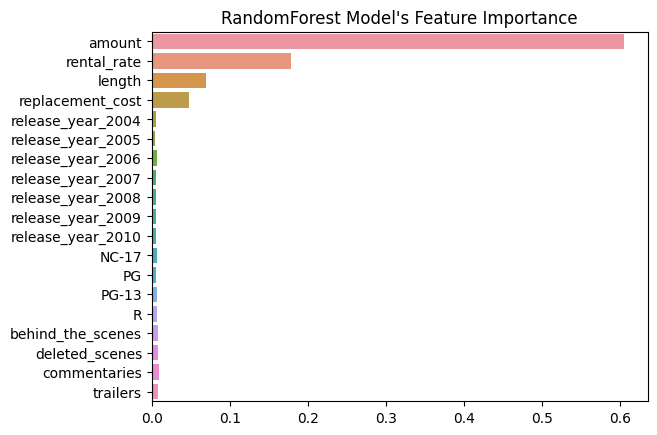

In [134]:
sns.barplot(y=rf_model.feature_names_in_, x=rf_model.feature_importances_, orient='h')
plt.title("RandomForest Model's Feature Importance")
plt.show()

Among the linear regression, decision tree, and random forest models, the random forest model yielded the lowest mean squared error. It identified `amount`, `rental_rate`, `length`, and `replacement_cost` as significant predictors of the target variable, while the importance of other features was negligible, with feature importance values close to 0.